In [ ]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

In [ ]:
dataset = pd.read_csv("../data/train_question_plus.csv")
dataset.head()

,id,paragraph,question,choices,answer,question_plus
0,generation-for-nlp-425,"상소하여 아뢰기를 , “신이 좌참 찬 송준길이 올린 차자를 보았는데 , 상복(喪服)...",상소한 인물이 속한 붕당에 대한 설명으로 옳은 것만을 모두 고르면?,"['ㄱ, ㄴ', 'ㄱ, ㄷ', 'ㄴ, ㄹ', 'ㄷ, ㄹ']",2,ㄱ.기 사환국으로 정권을 장악하였다 .ㄴ.인 조반정을 주도 하여 집권세력이 되었다 ...
1,generation-for-nlp-427,나는 삼한(三韓) 산천의 음덕을 입어 대업을 이루었다.(가)는/은 수덕(水德)이 순...,(가) 지역에 대한 설명으로 옳은 것은?,"['이곳에 대장도감을 설치하여 재조대장경을 만들었다.', '지눌이 이곳에서 수선사 ...",4,NaN
2,generation-for-nlp-428,이 날 소정방이 부총관 김인문 등과 함께 기 벌포에 도착하여 백제 군사와 마주쳤다....,밑줄 친 ‘그’에 대한 설명으로 옳은 것은?,"['살수에서 수의 군대를 물리쳤다 .', '김춘추 의 신라 왕위 계승을 지원하였다 ...",2,NaN
3,generation-for-nlp-429,"선비들 수만 명이 대궐 앞에 모여 만 동묘와 서원을 다시 설립할 것을 청하니, (가...",(가) 인물이 추진한 정책으로 옳지 않은 것은?,"['사창제를 실시하였다 .', '대전회통을 편찬하였다 .', '비변사의 기능을 강화...",3,NaN
4,generation-for-nlp-431,(가)의 사신 고제덕 등이 일본에 와서 왕이 보낸 국서를 전하였다. 그 국서에 이르...,(가) 국가에 대한 설명으로 옳은 것은?,"['나 당연합군의 공격으로 멸망하였다 .', '9주 5소경의 지방 행정 구역을 두었...",3,NaN


In [ ]:
# note: dataset.head() 동작으로 칼럼 명 정보륾 확인하고 동작해주세요.
PARAGRAPH = "paragraph"
QUESTION = "question"
CHOICES = "choices"
ANSWER = "answer"
QUESTION_PLUS = "question_plus"

GPT 4o mini 세팅


In [ ]:
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
if not OPENAI_API_KEY:
    raise ValueError("OpenAI API 키를 .env 파일에 저장하세요.")

In [ ]:
prompt = PromptTemplate.from_template(
    """
지문: {paragraph}
선지: {choices}
문제: {question}

다음 중 가장 적절한 분류 카테고리를 선택하세요:
- 사실 확인 유형: 지문 정보만으로 해결할 수 있는 유형
- 연결형 추론 유형: 지문 정보만으로 해결 불가능한 유형 중, 외부 지식이 필요한 유형
- 도출형 추론 유형: 지문 정보만으로 해결 불가능한 유형 중, 언어적 추가 사고 과정으로 해결할 수 있는 유형
- 논리형 추론 유형: 지문 정보만으로 해결 불가능한 유형 중, 논리/수리적 추가 사고 과정으로 해결할 수 있는 유형

각 유형의 정의를 고려하여 지문과 선지를 분석하고, 문제를 해결하기 위한 여러 가능한 사고 경로를 내부적으로 탐색하세요. 
각 경로의 타당성을 평가하고, 가장 적절한 분류 카테고리 번호를 결정하세요.

결과는 카테고리 제목만 출력하세요:
"""
)

In [ ]:
llm = ChatOpenAI(
    model="gpt-4o-mini", temperature=0, max_tokens=None, timeout=None, max_retries=2, api_key=OPENAI_API_KEY
)

chain = prompt | llm

In [ ]:
def classify_problem(data: pd.Series) -> str:
    """프롬프트에 따라 LLM이 문제 데이터를 분류하고 결과를 문자열로 반환하는 함수

    Args:
        data (pd.Series): 제공된 데이터셋의 한 행(row), 문제 하나

    Returns:
        str: 문제가 분류된 카테고리
    """
    results = chain.invoke(
        {"paragraph": test_data[PARAGRAPH], "choices": test_data[CHOICES], "question": test_data[QUESTION]}
    )
    return results.content


# test
test_data = dataset.iloc[10]
print(f"문제: {test_data.values}\n카테고리: {classify_problem(test_data)}")

문제: ['generation-for-nlp-437'
 '1929년에 통학열차를 이용하던 한 일본인 학생이 한국인 여학생을 희롱한 사건이 일어났다. 이에 분노한 한국인 학생은 일본인 학생에 맞서 싸웠다. 이 때 일제 경찰은 일본인 학생 만두둔하고 나섰다. 광주의 학생들은 이에 대응해 시위를 벌였다. 일제의 차별정책에 맞서 일어난 이 운동은 전국으로 퍼졌고 곳곳에서 동맹휴학 투쟁이 연이어 벌어졌다.'
 '밑줄 친 ‘이 운동’에 대한 설명으로 옳은 것은?'
 "['진주에서 조선형평사가 창설되는 결과로 이어졌다.', '조선민립대학 설립운동이 시작되는 배경이 되었다.', '신간회가 그 진상을 규명하고자 조사단을 현지에 파견하였다.', '비타협 적 민족주의자들이 조선 민흥회를 만들게 된 계기가 되었다.']"
 3 nan]
카테고리: 연결형 추론 유형


사전 실험 1: 랜덤하게 100개 데이터를 추출해서 유형 분석해보기


In [ ]:
sampled_dataset = dataset.sample(100, random_state=42)
sampled_dataset["category"] = sampled_dataset.apply(classify_problem, axis=1)

In [ ]:
mpl.rcParams["font.family"] = "AppleGothic"
mpl.rcParams["axes.unicode_minus"] = False

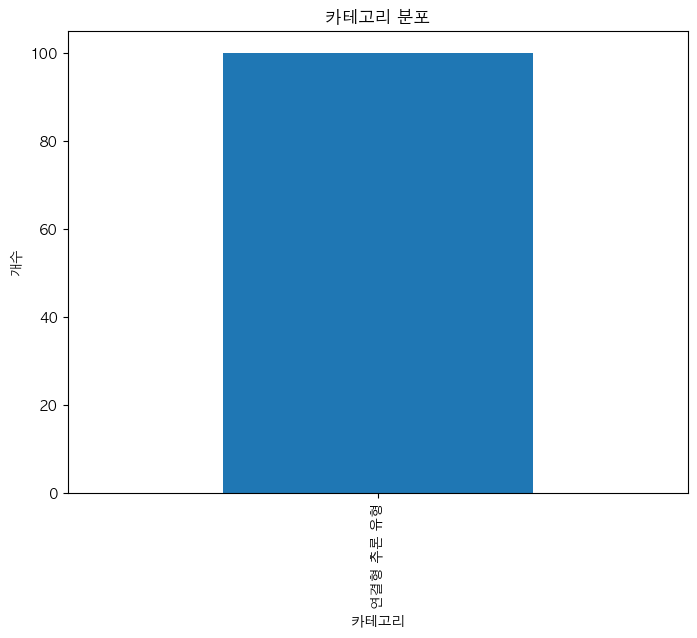

In [ ]:
category_counts = sampled_dataset["category"].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind="bar")
plt.title("카테고리 분포")
plt.xlabel("카테고리")
plt.ylabel("개수")
plt.show()